In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [15]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
139,NaN,Japan,36.0,138.0,2,2,2,2,4,4,...,1866,1866,1953,2178,2495,2617,3139,3139,3654,3906


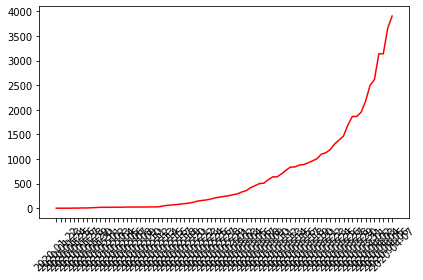

In [16]:
japan = data[data["Country/Region"] == "Japan"]
display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [19]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/04-07-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2592,NaN,NaN,Australian Capital Territory,Australia,2020-04-07 23:11:31,-35.4735,149.0124,96,2,40,54,"Australian Capital Territory, Australia"
2639,NaN,NaN,New South Wales,Australia,2020-04-07 23:11:31,-33.8688,151.2093,2686,21,4,2661,"New South Wales, Australia"
2643,NaN,NaN,Northern Territory,Australia,2020-04-07 23:11:31,-12.4634,130.8456,28,0,2,26,"Northern Territory, Australia"
2651,NaN,NaN,Queensland,Australia,2020-04-07 23:11:31,-27.4698,153.0251,934,4,173,757,"Queensland, Australia"
2664,NaN,NaN,South Australia,Australia,2020-04-07 23:11:31,-34.9285,138.6007,411,1,53,357,"South Australia, Australia"
2666,NaN,NaN,Tasmania,Australia,2020-04-07 23:11:31,-42.8821,147.3272,89,2,26,61,"Tasmania, Australia"
2670,NaN,NaN,Victoria,Australia,2020-04-07 23:11:31,-37.8136,144.9631,1191,11,620,560,"Victoria, Australia"
2672,NaN,NaN,Western Australia,Australia,2020-04-07 23:11:31,-31.9505,115.8605,460,4,162,294,"Western Australia, Australia"


Confirmed in AU:  5895
Recovered in AU:  1080
Deaths in AU:     45
Total Confirmed:  1426096
Total Recovered:  300054
Total Deaths:     81865
Total Active:     668733
Recover Rate:     21.04 %
Deaths Rate:      5.74 %
AU Recover Rate:  18.321 %
AU Deaths Rate:   0.763 %
